# HEALTHCARE MANAGEMENT CASE STUDY

## This case study involves predicting the length of stay of a patient at the time of registration in the hospital with the information given in the dataset.
## So the target variable here is the 'Stay' and the rest are independent variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\great lakes exercise\Projects\Capstone\healthcare\train_data.csv')

In [3]:
df=df.rename(columns = {'Available Extra Rooms in Hospital':'Available Extra rooms'})

In [4]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra rooms,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [5]:
feature = pd.read_csv(r'C:\Users\user\Documents\great lakes exercise\Projects\Capstone\healthcare\train_data_dictionary.csv')

In [6]:
feature

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   case_id                318438 non-null  int64  
 1   Hospital_code          318438 non-null  int64  
 2   Hospital_type_code     318438 non-null  object 
 3   City_Code_Hospital     318438 non-null  int64  
 4   Hospital_region_code   318438 non-null  object 
 5   Available Extra rooms  318438 non-null  int64  
 6   Department             318438 non-null  object 
 7   Ward_Type              318438 non-null  object 
 8   Ward_Facility_Code     318438 non-null  object 
 9   Bed Grade              318325 non-null  float64
 10  patientid              318438 non-null  int64  
 11  City_Code_Patient      313906 non-null  float64
 12  Type of Admission      318438 non-null  object 
 13  Severity of Illness    318438 non-null  object 
 14  Visitors with Patient  318438 non-nu

In [8]:
from IPython.display import display, Markdown
Markdown('<strong>The dataset contains information about {} patients</strong><br/>'.format(len(df['patientid'].unique())))

<strong>The dataset contains information about 92017 patients</strong><br/>

In [9]:
Markdown('<strong>The number of records this dataset contain is {} and the number of variables involved are {}</strong><br/>'.format(df.shape[0],df.shape[1]))

<strong>The number of records this dataset contain is 318438 and the number of variables involved are 18</strong><br/>

In [10]:
df.isnull().sum()

case_id                     0
Hospital_code               0
Hospital_type_code          0
City_Code_Hospital          0
Hospital_region_code        0
Available Extra rooms       0
Department                  0
Ward_Type                   0
Ward_Facility_Code          0
Bed Grade                 113
patientid                   0
City_Code_Patient        4532
Type of Admission           0
Severity of Illness         0
Visitors with Patient       0
Age                         0
Admission_Deposit           0
Stay                        0
dtype: int64

In [11]:
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0],inplace = True)

In [12]:
df['Bed Grade'].fillna(df['Bed Grade'].mode()[0],inplace = True)

In [13]:
df.isnull().sum()

case_id                  0
Hospital_code            0
Hospital_type_code       0
City_Code_Hospital       0
Hospital_region_code     0
Available Extra rooms    0
Department               0
Ward_Type                0
Ward_Facility_Code       0
Bed Grade                0
patientid                0
City_Code_Patient        0
Type of Admission        0
Severity of Illness      0
Visitors with Patient    0
Age                      0
Admission_Deposit        0
Stay                     0
dtype: int64

#### For now filling with the mode of the variable since the values in this variable are discrete and the number of null value records are negligable compared to the size of the dataset. Let us explore the data further to see if there are any underlying patterns and the possibility of imputing the null values logically

<AxesSubplot:>

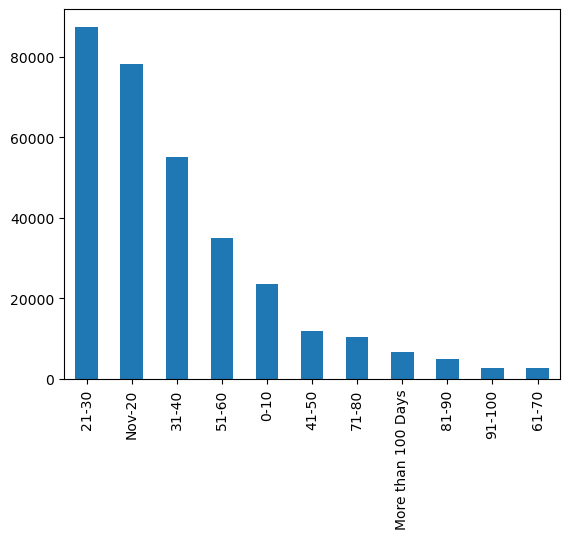

In [14]:
df['Stay'].value_counts().plot(kind = 'bar')

In [15]:
df['Stay'].replace({'Nov-20':'11-20'},inplace = True)

<AxesSubplot:>

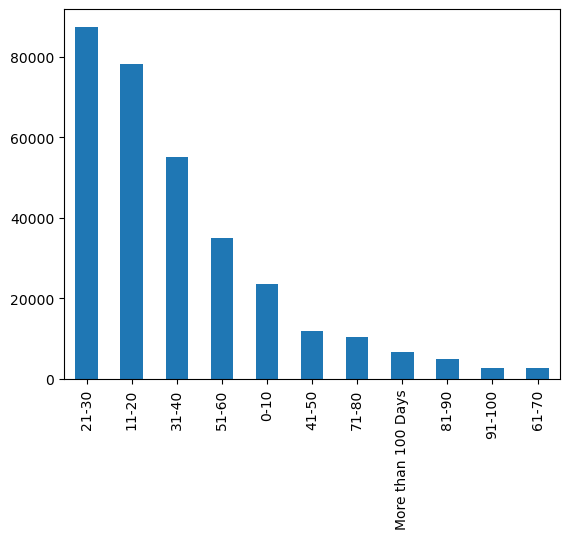

In [16]:
df['Stay'].value_counts().plot(kind = 'bar')

#### The classes in the Stay variable does look fairly imbalanced so we shall be balancing the classes during the model building stage, right now we shall proceed with the exploratory data analysis

In [17]:
df.drop('case_id',axis = 1,inplace = True)

I feel case_id won't be that significant of a variable that will be useful for prediction or analysis since it just plays the same role as a row index. 
So we are removing it for now

In [18]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra rooms,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [29]:
df['Age'].replace({'Nov-20':'11-20'},inplace = True)

#### Since these are historical records of each case I assume that at the time of registration varaibles such as Type of admission, Severity of illness, Department and Age will play a very significant role in affecting the length of stay of the patients than other variables so let us first analyse these variables and go with the rest

In [30]:
sig_1 = df[['Type of Admission','Severity of Illness','Department','Age']].columns.to_list()

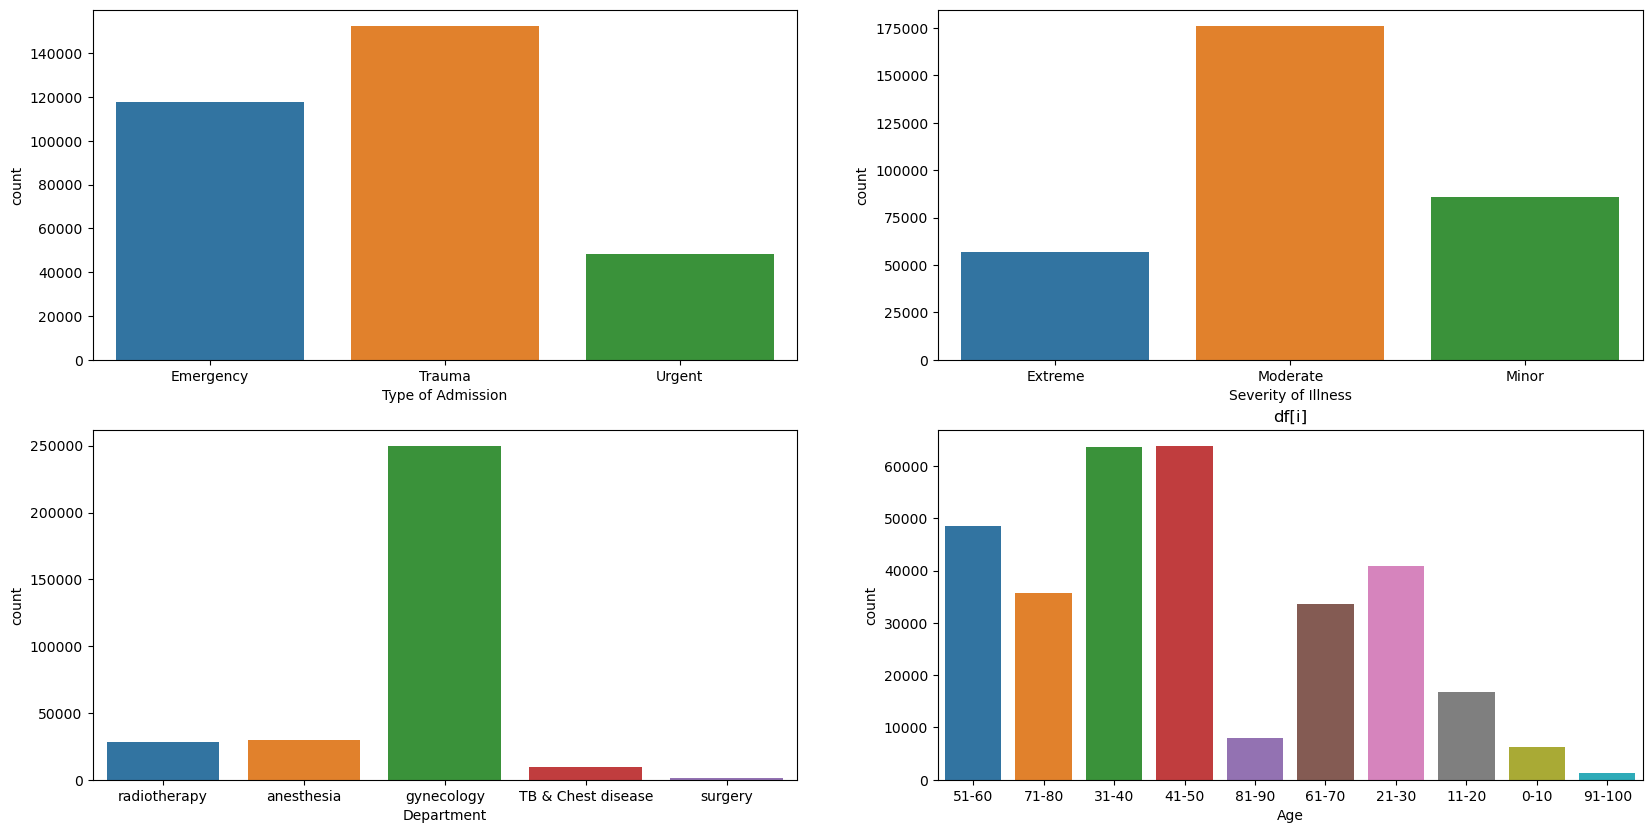

In [31]:
fig,ax = plt.subplots(2,2,figsize = (20,10))
for i,subplot in zip(sig_1,ax.flatten()):
    sns.countplot(df[i],ax = subplot)
    plt.title('df[i]')
    
plt.show()

* Most of the admissions are pertaining to trauma followerd by emergency. Urgent admissions are low when compared to emergency and Trauma cases


* Cases with moderate illness are the higest followed by minor. Extreme cases are the lowest comparatively



* In terms of department gynecology cases are exponentially high compared to other cases(radiotherapy,anesthesia,TB&chest disease,surgery). Tb & chest disease cases are slightly higher than surgery cases with the latter being the lowest. Number of radiotherapy and anesthesia cases are almost the same(28516 & 29649 respectively) but are exponentially lower than the gynecology cases but slightly higher than TB&Chest diesease and surgery cases



* The dataset has cases whose patient's age range from 0(assuming a new born baby) to 100. Out of which cases belonging to age range 31-40 and 41-50 are highest with around 63639 and 63749 respectively. Cases belonging to 91-100 age group are the lowest followed by 0-10 and 81-90 (1302,6254,7890 respectively).Cases belonging to 51-60 are slightly higher than cases belonging to 21-30 but lower than cases belonging to 31-40 and 41-50. Cases belonging to 21-30 are slightly higher than 61-70 and 71-80. 11-20 are higher than 0-10,91-100,81-90 but lower than 21-30 age group

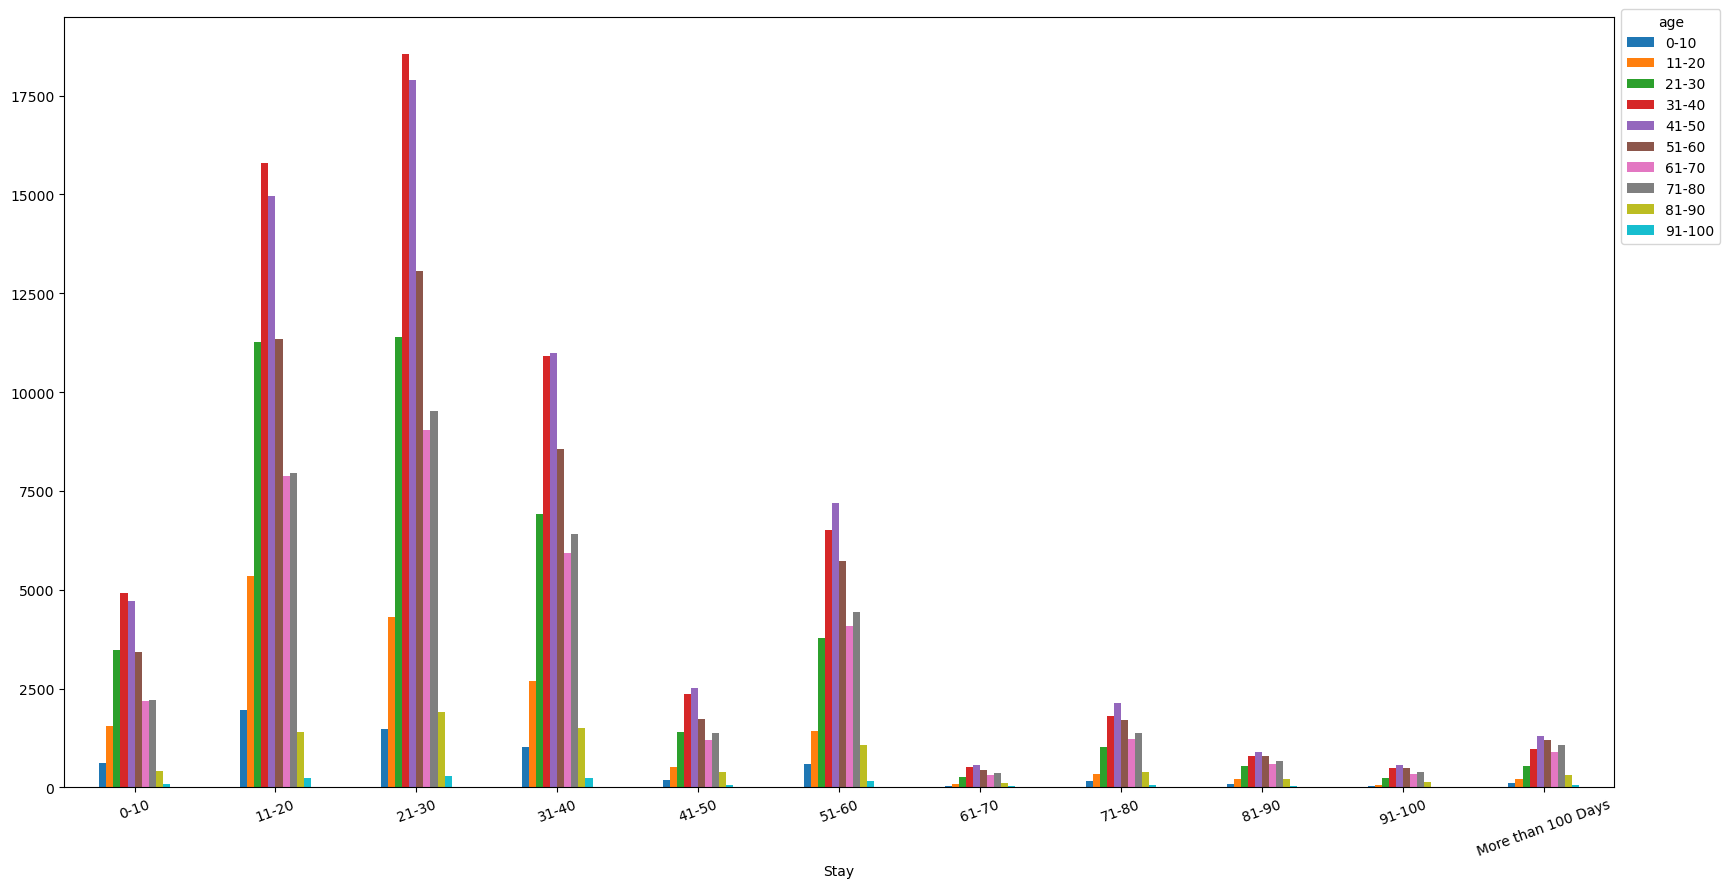

In [70]:
ct = pd.crosstab(df['Stay'],df['Age'])
ax = ct.plot(kind='bar',rot=20,figsize=(20, 10))
ax.legend(title='age', bbox_to_anchor=(1, 1.02), loc='upper left')

* For the cases whose length of stay is in the period 0-10,11-20 and 21-30 cases belonging to the age group 31-40 is the highest. 


* From the cases whose length of stay is greater than 31 that is from 31-40 to more than 100 days cases highest number of cases belong to age group 41-50 


* Only in length of stay class of 11-20 the cases belonging to the age group 0-10 is the highest.From the length of stay classes 61-70 to more than 100 days the number of cases belonging to 0-10 age group is almost negligable


* From 31-40 length of stay till 71-80 the number of cases belonging to the 41-50 age group will be the highest followed by 31-40 age group followed by 51-60 age group but from length of stay of 81-90 more than days it becomes the exactly opposite where people belonging to age group 51-60 is either equal to 31-40 age group or greater. 



* Though from this we can't draw a clean conclusion we can say to some extent that length of stay increases as age increase but that also contradicts for some age groups for example there are people who belong to the age group 81-90 in all the length of stay classes 



* We can still say age does play an important effect in the length of stay we need to see how age effective when combined with other variables such as type of admission and severity of illness

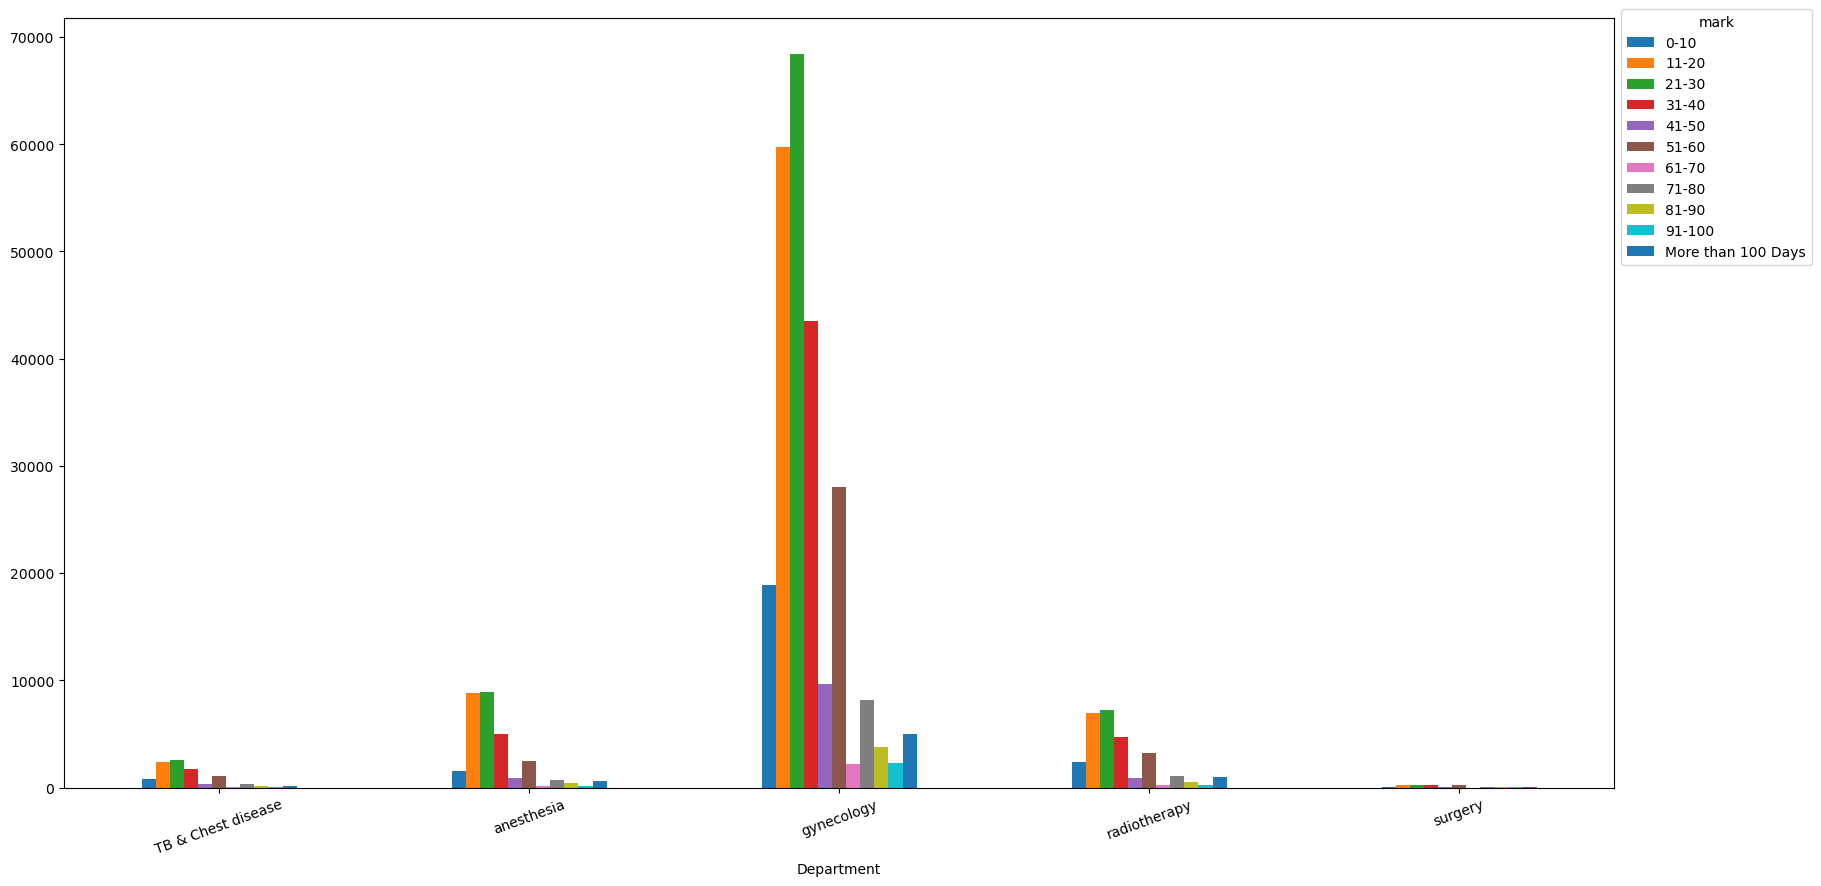

In [66]:
ct = pd.crosstab(df['Department'],df['Stay'])
ax = ct.plot(kind='bar',rot=20,figsize=(20, 10))
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

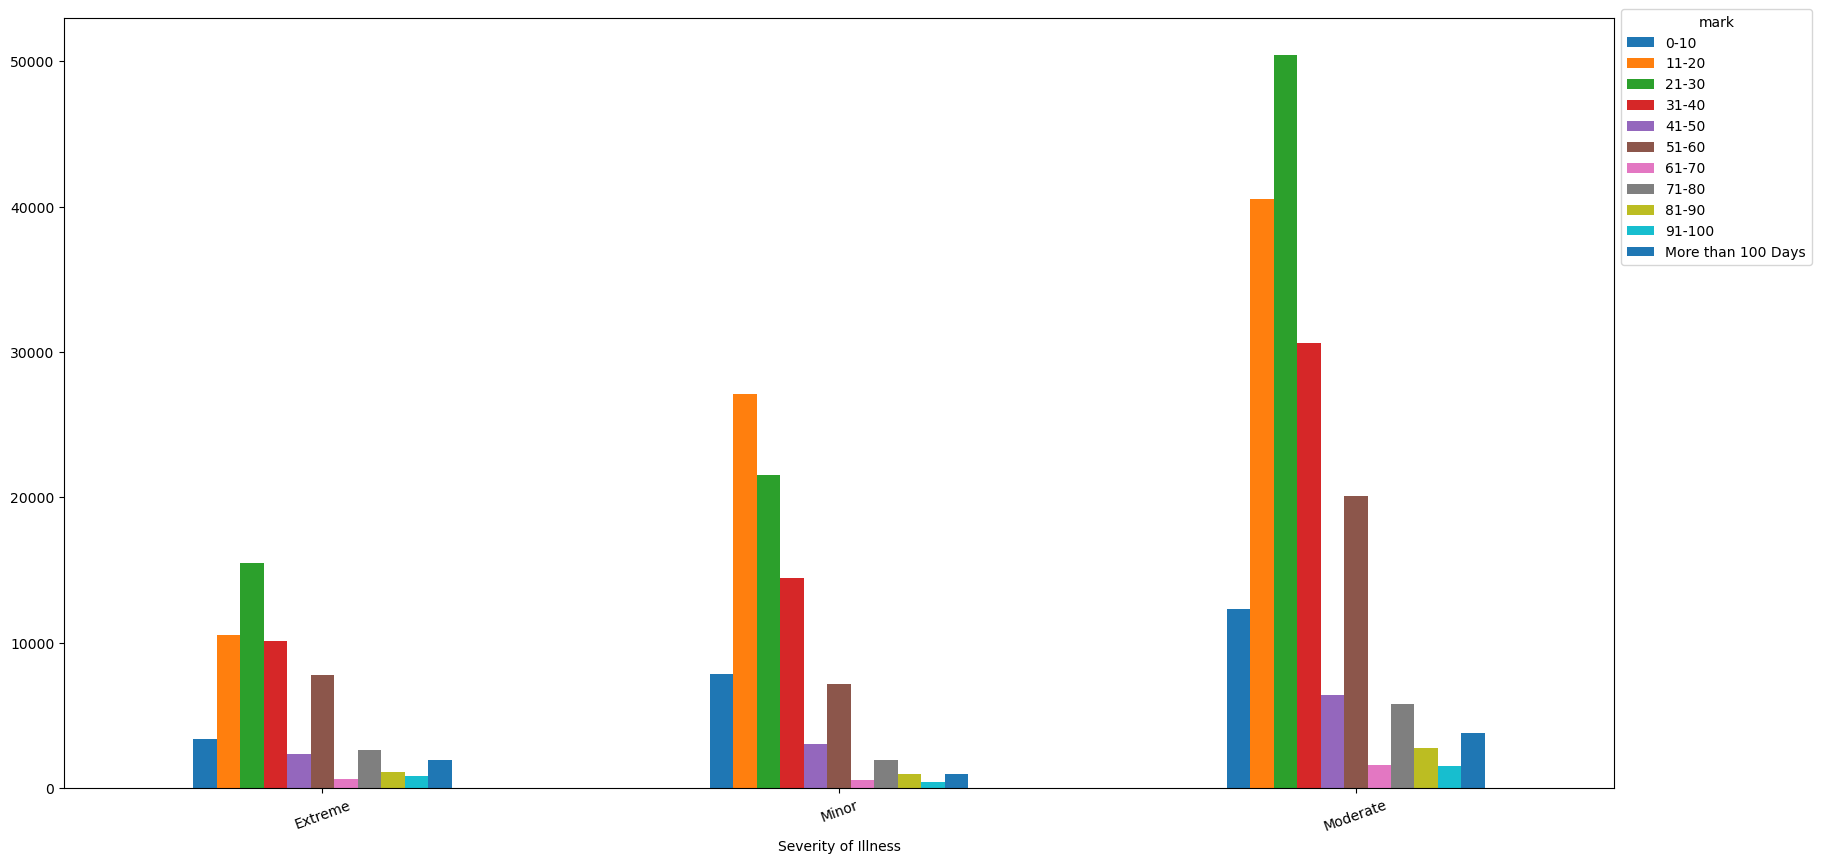

In [67]:
ct = pd.crosstab(df['Severity of Illness'],df['Stay'])
ax = ct.plot(kind='bar',rot=20,figsize=(20, 10))
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

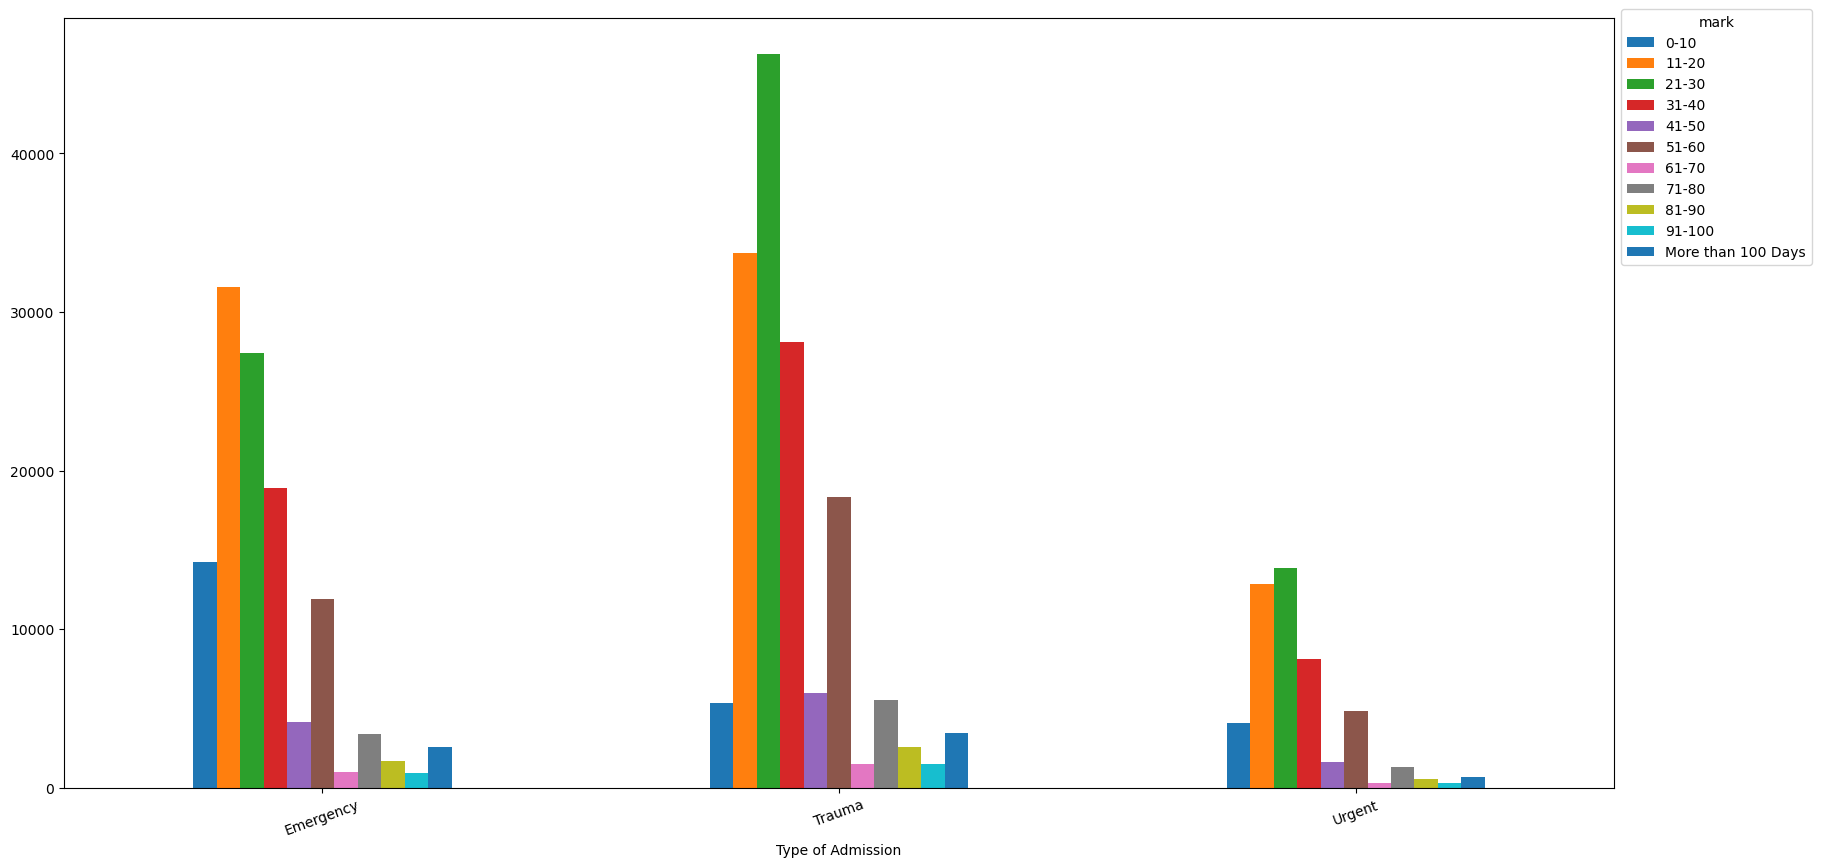

In [68]:
ct = pd.crosstab(df['Type of Admission'],df['Stay'])
ax = ct.plot(kind='bar',rot=20,figsize=(20, 10))
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

## Base model building

In [21]:
df1 = df.copy(deep = True)

In [22]:
x = df1.drop('Stay',axis = 1)
y = df1['Stay']

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.70,random_state = 100)

In [24]:
xtrain = pd.get_dummies(xtrain)

In [25]:
xtest = pd.get_dummies(xtest)

In [26]:
dc = DecisionTreeClassifier(max_depth = 10,criterion = 'gini')
model_base = dc.fit(xtrain,ytrain)
ypred = model_base.predict(xtest)

In [27]:
print(classification_report(ytest,ypred))

                    precision    recall  f1-score   support

              0-10       0.37      0.15      0.21      7055
             11-20       0.41      0.47      0.44     23474
             21-30       0.41      0.65      0.51     26259
             31-40       0.40      0.26      0.31     16640
             41-50       0.10      0.00      0.00      3443
             51-60       0.41      0.42      0.41     10495
             61-70       0.12      0.00      0.00       847
             71-80       0.28      0.02      0.04      3052
             81-90       0.31      0.23      0.26      1479
            91-100       0.33      0.02      0.04       813
More than 100 Days       0.52      0.34      0.41      1975

          accuracy                           0.41     95532
         macro avg       0.33      0.23      0.24     95532
      weighted avg       0.39      0.41      0.38     95532

